In [1]:
import pandas as pd

df = pd.read_csv("../data/salesweekly.csv")
print(df.columns.tolist())


['datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06']


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import sys, os

# Add project root to path (so it can find your src folder)
sys.path.append(os.path.abspath(".."))

from src.data_processing import load_sales_data

# Optional: suppress warnings
import warnings
warnings.filterwarnings("ignore")


c:\Users\aarti\Documents\Supply Chain Optimisation ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [1]:
print(sales_df.columns)


NameError: name 'sales_df' is not defined

In [2]:
import pandas as pd
sales_df = pd.read_csv(r"../data/salesweekly.csv")  # adjust path if needed
print(sales_df.columns)


Index(['date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06'], dtype='object')


In [3]:
# Force pandas to split on commas
sales_df = pd.read_csv(r"../data/salesweekly.csv", sep=",")
print(sales_df.columns)


Index(['date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06'], dtype='object')


In [4]:
import pandas as pd

# Step 1: Read CSV correctly
sales_df = pd.read_csv(r"../data/salesweekly.csv", sep=",", quotechar='"')

In [5]:
# Step 2: Strip any extra whitespace from column names
sales_df.columns = sales_df.columns.str.strip()

In [6]:
# Step 3: Check the columns
print(sales_df.columns)

Index(['date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06'], dtype='object')


In [7]:
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')


KeyError: 'date'

In [8]:
import pandas as pd

sales_df = pd.read_csv(
    r"../data/salesweekly.csv",  # adjust your path
    sep=",",                     # comma-separated
    quotechar='"',               # handle quotes
    engine='python'              # sometimes needed if quoting is inconsistent
)


In [9]:
print(sales_df.columns)


Index(['date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06'], dtype='object')


In [10]:
sales_df.columns = sales_df.columns.str.strip()


In [11]:
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')


KeyError: 'date'

In [12]:
import pandas as pd

# Step 1: Read CSV without header
sales_df = pd.read_csv(r"../data/salesweekly.csv", header=None)

# Step 2: Set proper column names
columns = sales_df.iloc[0, 0].split(",")  # split first row by commas
sales_df = sales_df[1:]                   # remove the old header row
sales_df.columns = columns                # assign correct column names

# Step 3: Strip spaces (safety)
sales_df.columns = sales_df.columns.str.strip()

# Step 4: Convert date column
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')

print(sales_df.head())


ValueError: Length mismatch: Expected axis has 1 elements, new values have 9 elements

In [13]:
import pandas as pd

# Step 1: Read CSV without header
sales_df = pd.read_csv(r"../data/salesweekly.csv", header=None)


In [19]:
# Step 2: Set proper column names
columns = sales_df.iloc[0, 0].split(",")  # split first row by commas

# Remove the old header row
sales_df = sales_df[1:]

# Split the first column into multiple columns
sales_df = sales_df.iloc[:, 0].str.split(",", expand=True)

# Assign correct column names
sales_df.columns = columns

In [21]:
sales_df.columns = sales_df.columns.str.strip()

In [22]:
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')

KeyError: 'date'

In [23]:
print(sales_df.columns.tolist())


['2/2/2014']


In [26]:
# Rename the column to 'date' for clarity
sales_df = sales_df.rename(columns={sales_df.columns[0]: 'date'})
# Convert the 'date' column to datetime
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')


In [27]:
sales_long = sales_df.melt(
    id_vars=['date'],        # keep the 'date' column as is
    var_name='product_code', # new column to hold the old column names
    value_name='units_sold'  # new column to hold the values
)


In [28]:
print(sales_long.head())


Empty DataFrame
Columns: [date, product_code, units_sold]
Index: []


In [29]:
print(sales_df.columns)


Index(['date'], dtype='object')


In [30]:
print(sales_df.head())
print(sales_df.columns)


         date
6  2014-02-09
7  2014-02-16
8  2014-02-23
9  2014-03-02
10 2014-03-09
Index(['date'], dtype='object')


In [31]:
sales_df = pd.read_csv(r"../data/salesweekly.csv", header=None)

In [32]:
columns = sales_df.iloc[0, 0].split(",")  # split first row by commas
sales_df = sales_df[1:]  # remove header row
sales_df = sales_df.iloc[:, 0].str.split(",", expand=True)  # expand all columns
sales_df.columns = columns  # assign proper column names

In [33]:
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')

In [34]:
sales_long = sales_df.melt(id_vars=['date'], var_name='product_code', value_name='units_sold')

In [35]:
sales_long['units_sold'] = pd.to_numeric(sales_long['units_sold'], errors='coerce')

In [36]:
print(sales_long.head())

        date product_code  units_sold
0 2014-01-05        M01AB       14.00
1 2014-01-12        M01AB       29.33
2 2014-01-19        M01AB       30.67
3 2014-01-26        M01AB       34.00
4 2014-02-02        M01AB       31.02


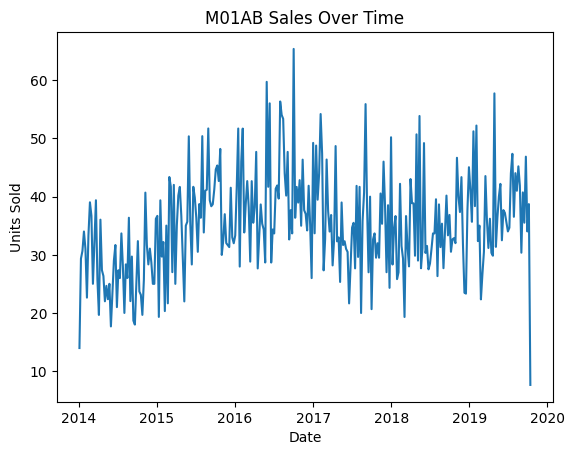

In [37]:
import matplotlib.pyplot as plt

m01ab = sales_long[sales_long['product_code'] == 'M01AB']
plt.plot(m01ab['date'], m01ab['units_sold'])
plt.title('M01AB Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()


In [39]:
import numpy as np

np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=52, freq='W')
synthetic_data = pd.DataFrame({
    'date': np.tile(dates, 3),  # 3 raw materials
    'material': np.repeat(['Media', 'Reagent', 'Bioreactor'], len(dates)),
    'demand_units': np.random.randint(50, 500, len(dates)*3)
})


In [41]:
from prophet import Prophet

df = synthetic_data[synthetic_data['material']=='Media'][['date','demand_units']].rename(columns={'date':'ds','demand_units':'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)


15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:53 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Optional for time series
from prophet import Prophet


In [46]:
# Feature engineering
sales_long['week'] = sales_long['date'].dt.isocalendar().week
sales_long['month'] = sales_long['date'].dt.month

X = sales_long[['week','month']]
y = sales_long['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [48]:
sales_long['safety_stock'] = sales_long['units_sold'] * 2.3  # 2.3x for biologics


In [47]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

RMSE: 37.856152971494204
MAE: 32.47942217920691


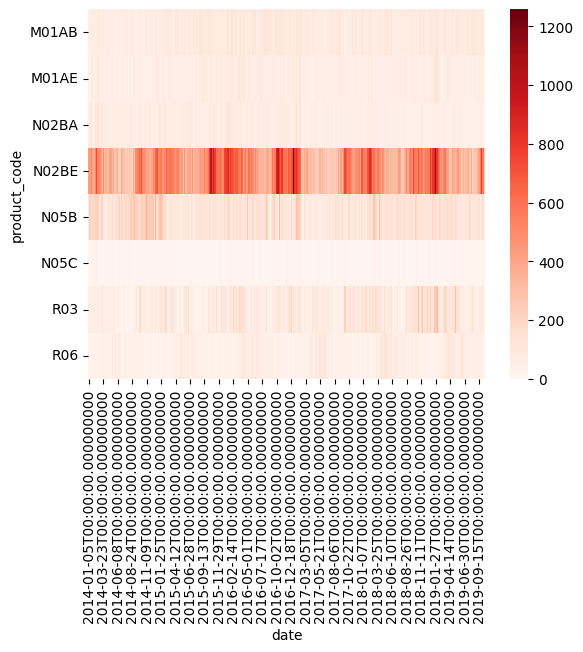

In [49]:
fig = px.line(sales_long, x='date', y='units_sold', color='product_code', title='Units Sold Over Time')
fig.show()

# Heatmap for stockout risk
stockout = sales_long.pivot_table(index='product_code', columns='date', values='safety_stock')
sns.heatmap(stockout, cmap='Reds')
plt.show()


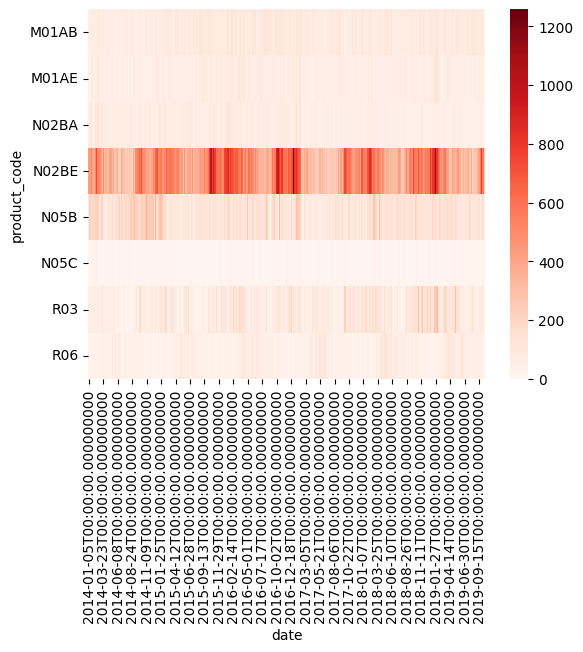

In [51]:
fig = px.line(sales_long, x='date', y='units_sold', color='product_code', title='Units Sold Over Time')
fig.show()

# Heatmap for stockout risk
stockout = sales_long.pivot_table(index='product_code', columns='date', values='safety_stock')
sns.heatmap(stockout, cmap='Reds')
plt.show()


In [65]:
# Step 1: Ensure 'ds' column in df is datetime
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')  # converts invalid formats to NaT
# Step 2: Create a formatted string column for plotting
df['date_str'] = df['ds'].dt.strftime('%Y-%m-%d')  # 'YYYY-MM-DD' format

# Step 3: Ensure 'date' column in sales_df is datetime
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')
# Step 4: Create a formatted string column for plotting
sales_df['date_str'] = sales_df['date'].dt.strftime('%Y-%m-%d')



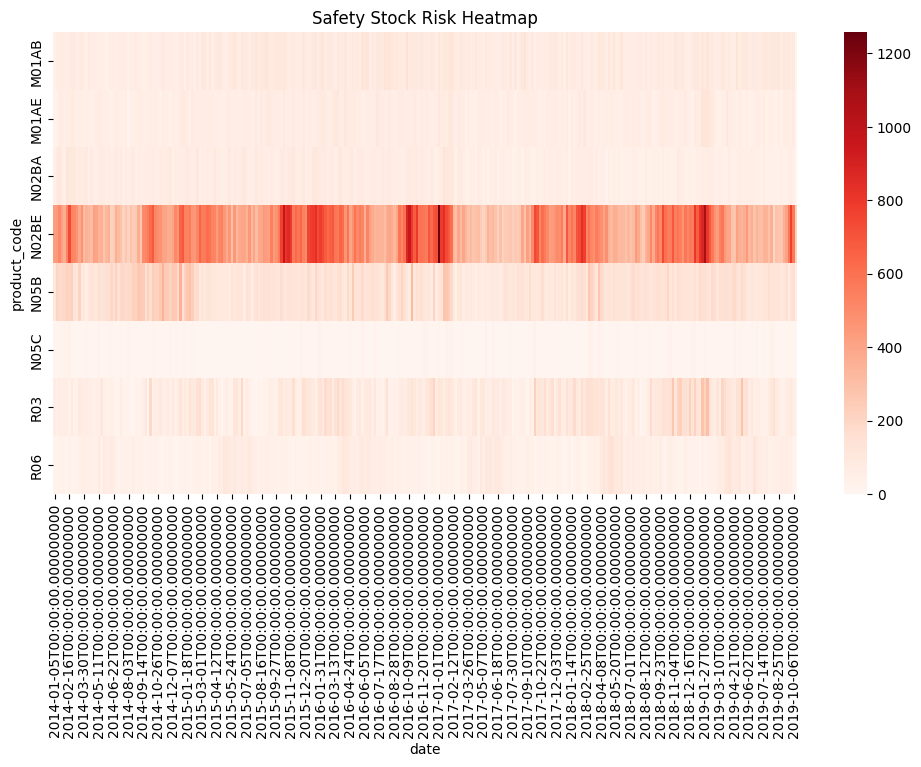

In [66]:
# 1. Units sold over time
fig = px.line(sales_long, x='date', y='units_sold', color='product_code', title='Units Sold Over Time')
fig.show()

# 2. Safety stock heatmap (stockout risk)
stockout = sales_long.pivot_table(index='product_code', columns='date', values='safety_stock')
plt.figure(figsize=(12,6))
sns.heatmap(stockout, cmap='Reds')
plt.title('Safety Stock Risk Heatmap')
plt.show()


In [67]:
sales_df['date_str'] = sales_df['date'].dt.strftime('%Y-%m-%d')


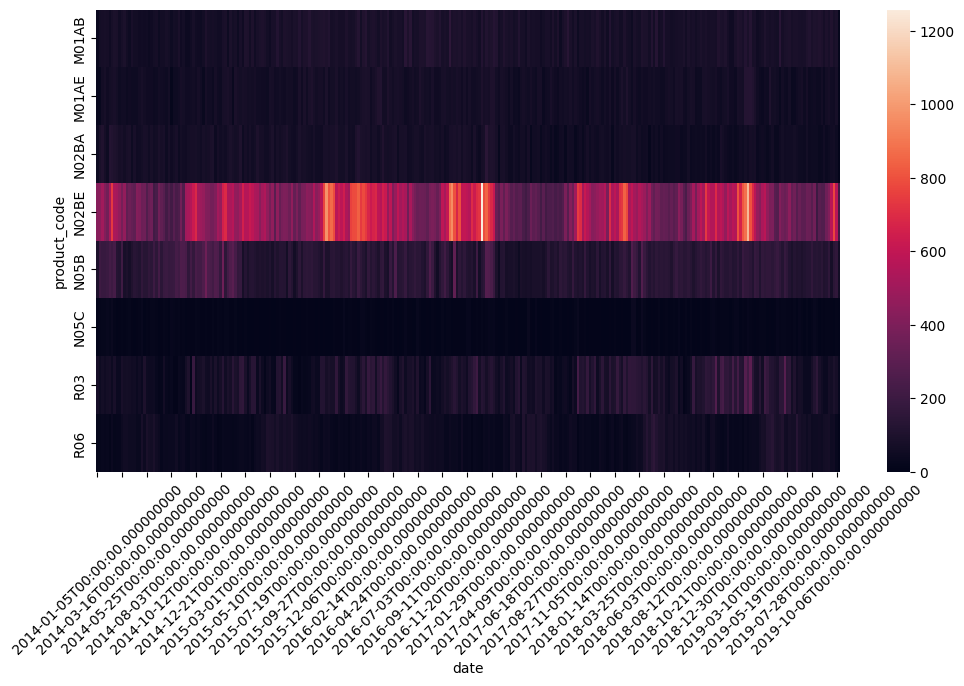

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(stockout, xticklabels=10, yticklabels=True)  # show every 10th x-tick
plt.xticks(rotation=45)
plt.show()


In [70]:
# Install PuLP if not already installed
%pip install pulp

import pulp

# Define materials
materials = ['Media', 'Reagent', 'Bioreactor']

# Aggregate last week's demand as baseline
last_week_demand = synthetic_data[synthetic_data['date']==synthetic_data['date'].max()]
demand_dict = dict(zip(last_week_demand['material'], last_week_demand['demand_units']))

# Cost per unit (arbitrary example)
cost_dict = {'Media': 10, 'Reagent': 25, 'Bioreactor': 100}

# Safety stock multiplier (2.3x)
safety_stock_multiplier = 2.3

# Initialize LP problem
prob = pulp.LpProblem("Supply_Optimization", pulp.LpMinimize)

# Decision variables: order quantity per material
order_qty = pulp.LpVariable.dicts("Order", materials, lowBound=0, cat='Continuous')

# Objective: minimize total cost
prob += pulp.lpSum([order_qty[m]*cost_dict[m] for m in materials]), "Total_Cost"

# Constraints: meet safety stock requirement
for m in materials:
    prob += order_qty[m] >= demand_dict[m] * safety_stock_multiplier, f"SafetyStock_{m}"

# Solve
prob.solve()

# Output results
optimization_results = {m: order_qty[m].varValue for m in materials}
optimization_results


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 4.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.4 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.4 MB 4.2 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.4 MB 3.9 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.4 MB 4.2 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/16.4 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.4 MB 4.3 MB/s eta 0:00:03
   --------------- ------------------------ 6.6/16.4 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.4 MB 3.8 MB/s eta 0:00:03
   ----------------- ---------------------- 7.3/16.4 MB 3.6 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.4 MB 3.3 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.4 MB 3.3 MB/s eta 0:00:03
   ---

{'Media': 161.0, 'Reagent': 956.8, 'Bioreactor': 703.8}

In [71]:
# Bar chart for optimized order quantities
opt_df = pd.DataFrame({
    'material': list(optimization_results.keys()),
    'order_qty': list(optimization_results.values())
})

fig = px.bar(opt_df, x='material', y='order_qty', color='material',
             title='Optimized Order Quantities for Biologics Materials')
fig.show()


In [72]:
# Example: merge forecasted demand + LP safety stock
forecasted_demand = forecast[['ds','yhat']].tail(12)  # last 12 weeks forecast
forecasted_demand['safety_stock'] = forecasted_demand['yhat'] * safety_stock_multiplier

fig = px.line(forecasted_demand, x='ds', y=['yhat','safety_stock'],
              labels={'ds':'Date', 'value':'Units'},
              title='Forecasted Demand vs Safety Stock (Media)')
fig.show()


In [12]:
from prophet import Prophet

# Prepare Media data for Prophet
df = synthetic_data[synthetic_data['material']=='Media'][['date','demand_units']].rename(columns={'date':'ds','demand_units':'y'})

# Fit Prophet model
model = Prophet()
model.fit(df)

# Make future dataframe and forecast
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

16:42:32 - cmdstanpy - INFO - Chain [1] start processing
16:42:32 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
import pulp

materials = ['Media', 'Reagent', 'Bioreactor']

# Aggregate last week's demand as baseline
last_week_demand = synthetic_data[synthetic_data['date'] == synthetic_data['date'].max()]
demand_dict = dict(zip(last_week_demand['material'], last_week_demand['demand_units']))

cost_dict = {'Media': 10, 'Reagent': 25, 'Bioreactor': 100}
safety_stock_multiplier = 2.3

prob = pulp.LpProblem("Supply_Optimization", pulp.LpMinimize)
order_qty = pulp.LpVariable.dicts("Order", materials, lowBound=0, cat='Continuous')

# Objective: minimize total cost
prob += pulp.lpSum([order_qty[m] * cost_dict[m] for m in materials]), "Total_Cost"

# Constraints: meet safety stock requirement
for m in materials:
    prob += order_qty[m] >= demand_dict[m] * safety_stock_multiplier, f"SafetyStock_{m}"

prob.solve()

# Output results
optimization_results = {m: order_qty[m].varValue for m in materials}

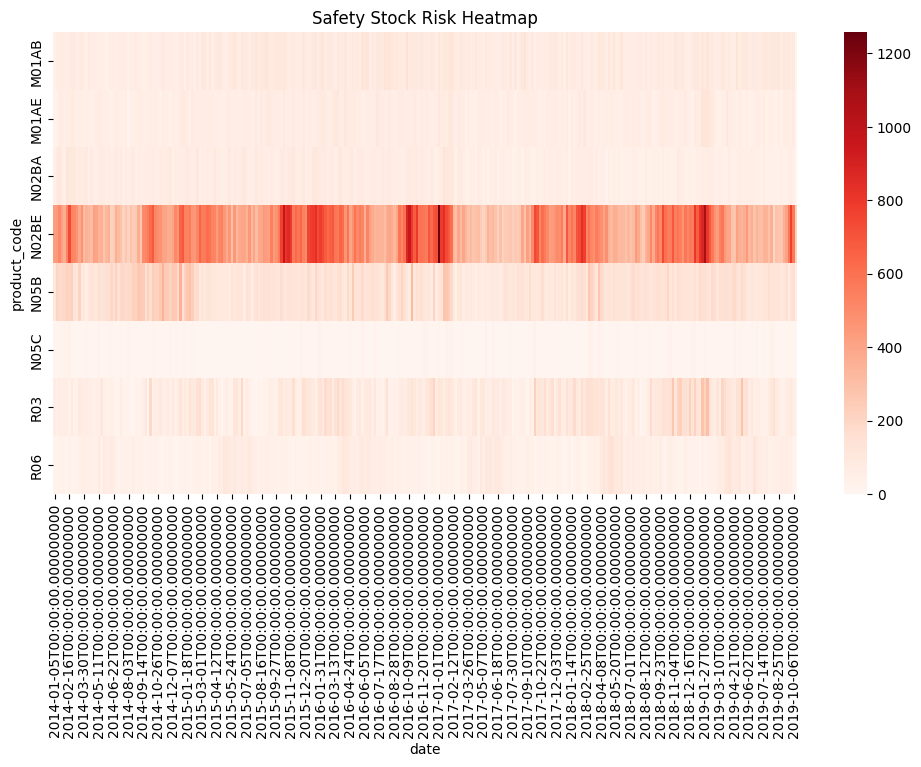

In [18]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure synthetic_data is defined
if 'synthetic_data' not in globals():
    import numpy as np
    np.random.seed(42)
    dates = pd.date_range(start='2024-01-01', periods=52, freq='W')
    synthetic_data = pd.DataFrame({
        'date': np.tile(dates, 3),
        'material': np.repeat(['Media', 'Reagent', 'Bioreactor'], len(dates)),
        'demand_units': np.random.randint(50, 500, len(dates)*3)
    })

# Ensure sales_df is defined
if 'sales_df' not in globals():
    sales_df = pd.read_csv(r"../data/salesweekly.csv", header=None)
    columns = sales_df.iloc[0, 0].split(",")
    sales_df = sales_df[1:]
    sales_df = sales_df.iloc[:, 0].str.split(",", expand=True)
    sales_df.columns = columns
    sales_df.columns = sales_df.columns.str.strip()
    sales_df['date'] = pd.to_datetime(sales_df['date'], format='%m/%d/%Y')

# Ensure sales_long is defined
if 'sales_long' not in globals():
    sales_long = sales_df.melt(id_vars=['date'], var_name='product_code', value_name='units_sold')

# Ensure units_sold is numeric and safety_stock column exists
sales_long['units_sold'] = pd.to_numeric(sales_long['units_sold'], errors='coerce')
sales_long['safety_stock'] = sales_long['units_sold'] * 2.3  # 2.3x for biologics

# 1. Units sold over time (all products)
fig = px.line(sales_long, x='date', y='units_sold', color='product_code', title='Units Sold Over Time')
fig.show()

# 2. Safety stock heatmap (stockout risk)
stockout = sales_long.pivot_table(index='product_code', columns='date', values='safety_stock')
plt.figure(figsize=(12,6))
sns.heatmap(stockout, cmap='Reds')
plt.title('Safety Stock Risk Heatmap')
plt.show()

# 3. Distribution of weekly sales (boxplot)
fig = px.box(sales_long, x='product_code', y='units_sold', title='Distribution of Weekly Sales by Product')
fig.show()

# 4. Actual vs Forecasted Sales (for Media, example)
if 'forecast' in globals():
    fig = px.line()
    fig.add_scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual Sales')
    fig.add_scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast')
    fig.update_layout(title='Actual vs Forecasted Sales (Media)', xaxis_title='Date', yaxis_title='Units')
    fig.show()

    # 5. Forecasted Demand vs Safety Stock (last 12 weeks, Media)
    forecasted_demand = forecast[['ds','yhat']].tail(12)
    # Ensure safety_stock_multiplier is defined
    if 'safety_stock_multiplier' not in globals():
        safety_stock_multiplier = 2.3  # default value

    forecasted_demand['safety_stock'] = forecasted_demand['yhat'] * safety_stock_multiplier
    fig = px.line(forecasted_demand, x='ds', y=['yhat','safety_stock'],
                  labels={'ds':'Date', 'value':'Units'},
                  title='Forecasted Demand vs Safety Stock (Media)')
    fig.show()
else:
    print("Variable 'forecast' is not defined. Please run the Prophet forecasting cell first.")

# 6. Optimized Order Quantities for Biologics Materials
if 'optimization_results' in globals():
    opt_df = pd.DataFrame({
        'material': list(optimization_results.keys()),
        'order_qty': list(optimization_results.values())
    })

    fig = px.bar(opt_df, x='material', y='order_qty', color='material',
                 title='Optimized Order Quantities for Biologics Materials')
    fig.show()

    # 7. Optimized Order vs Last Week Demand (comparison)
    opt_df['last_week_demand'] = opt_df['material'].map(demand_dict)
    fig = px.bar(opt_df, x='material', y=['order_qty', 'last_week_demand'],
                 barmode='group', title='Optimized Order vs Last Week Demand')
    fig.show()
else:
    print("Variable 'optimization_results' is not defined. Please run the optimization cell first.")

In [16]:
import pulp

materials = ['Media', 'Reagent', 'Bioreactor']

# Aggregate last week's demand as baseline
last_week_demand = synthetic_data[synthetic_data['date'] == synthetic_data['date'].max()]
demand_dict = dict(zip(last_week_demand['material'], last_week_demand['demand_units']))

cost_dict = {'Media': 10, 'Reagent': 25, 'Bioreactor': 100}
safety_stock_multiplier = 2.3

prob = pulp.LpProblem("Supply_Optimization", pulp.LpMinimize)
order_qty = pulp.LpVariable.dicts("Order", materials, lowBound=0, cat='Continuous')

# Objective: minimize total cost
prob += pulp.lpSum([order_qty[m] * cost_dict[m] for m in materials]), "Total_Cost"

# Constraints: meet safety stock requirement
for m in materials:
    prob += order_qty[m] >= demand_dict[m] * safety_stock_multiplier, f"SafetyStock_{m}"

prob.solve()

# Output results
optimization_results = {m: order_qty[m].varValue for m in materials}

C:\Users\aarti\AppData\Local\Temp\ipykernel_13484\4248899091.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




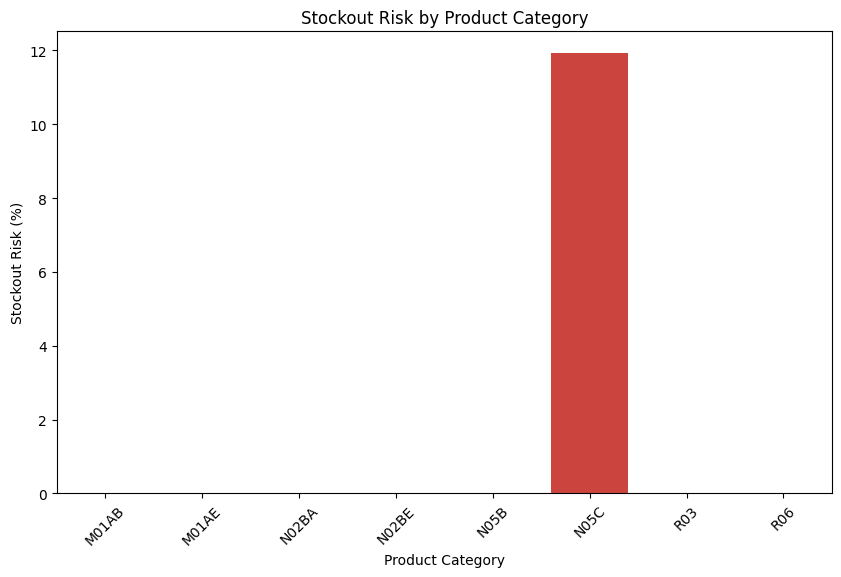

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create stockout flag: 1 if units_sold == 0, else 0
sales_long['Stockout_Flag'] = (sales_long['units_sold'] == 0).astype(int)

# Group by product_code and calculate stockout risk
stockout_summary = sales_long.groupby('product_code')['Stockout_Flag'].mean().reset_index()
stockout_summary['Stockout_Risk_Percent'] = stockout_summary['Stockout_Flag'] * 100

plt.figure(figsize=(10,6))
sns.barplot(x='product_code', y='Stockout_Risk_Percent', data=stockout_summary, palette='Reds')
plt.title('Stockout Risk by Product Category')
plt.ylabel('Stockout Risk (%)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


In [22]:
import pandas as pd

# Example inventory data
df_inventory = pd.DataFrame({
	'Product': ['Media', 'Reagent', 'Bioreactor'],
	'Base_Safety_Stock': [100, 200, 300]
})

# df_shortage has columns: 'Product', 'Shortage_Frequency'
# Example shortage data
df_shortage = pd.DataFrame({
	'Product': ['Media', 'Reagent', 'Bioreactor'],
	'Shortage_Frequency': [2, 5, 1]
})

df_inventory = df_inventory.merge(df_shortage[['Product','Shortage_Frequency']], on='Product', how='left')
df_inventory['Shortage_Frequency'].fillna(0, inplace=True)

# Adjusted safety stock formula
df_inventory['Adjusted_Safety_Stock'] = df_inventory['Base_Safety_Stock'] * (1 + df_inventory['Shortage_Frequency']/df_inventory['Shortage_Frequency'].max())

df_inventory[['Product','Base_Safety_Stock','Adjusted_Safety_Stock']].head()


C:\Users\aarti\AppData\Local\Temp\ipykernel_13484\2946105022.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Product,Base_Safety_Stock,Adjusted_Safety_Stock
0,Media,100,140.0
1,Reagent,200,400.0
2,Bioreactor,300,360.0


In [25]:

import pulp

# Example: Select subset of products for demo
products = sales_long['product_code'].unique()[:5]  # top 5 products for simplicity
df_opt = sales_long[sales_long['product_code'].isin(products)].groupby('product_code')['units_sold'].mean().reset_index()
df_opt['holding_cost'] = df_opt['units_sold'] * 0.5  # Example holding cost per unit
df_opt['stockout_cost'] = df_opt['units_sold'] * 2   # Penalty per unit shortage
df_opt['safety_stock'] = df_opt['units_sold'] * 2.3

# Define problem
prob = pulp.LpProblem("Inventory_Optimization", pulp.LpMinimize)

# Decision variables: units to stock for each product
stock_vars = {row['product_code']: pulp.LpVariable(f"stock_{row['product_code']}", lowBound=0, cat='Continuous') for idx, row in df_opt.iterrows()}

# Auxiliary variables for stockout amount
stockout_amount = {p: pulp.LpVariable(f"stockout_{p}", lowBound=0, cat='Continuous') for p in products}

# Constraints: stockout_amount >= safety_stock - stock_vars[p], stockout_amount >= 0
for p in products:
    prob += stockout_amount[p] >= df_opt.loc[df_opt['product_code']==p,'safety_stock'].values[0] - stock_vars[p]
    prob += stockout_amount[p] >= 0

# Objective: Minimize total cost = holding + expected stockout
prob += pulp.lpSum([
    stock_vars[p]*df_opt.loc[df_opt['product_code']==p,'holding_cost'].values[0] +
    stockout_amount[p]*df_opt.loc[df_opt['product_code']==p,'stockout_cost'].values[0]
    for p in products
])

# Constraint: Optional budget constraint (e.g., total stock <= 5000 units)
prob += pulp.lpSum([stock_vars[p] for p in products]) <= 5000

# Solve
prob.solve()

# Results
optimized_stock = {p: stock_vars[p].varValue for p in products}
optimized_stock


{'M01AB': 80.735614,
 'M01AE': 62.485506,
 'N02BA': 62.238678,
 'N02BE': 479.84247,
 'N05B': 142.00396}

In [26]:
optimized_df = pd.DataFrame(list(optimized_stock.items()), columns=['product_code','optimized_stock'])
fig = px.bar(optimized_df, x='product_code', y='optimized_stock', title='Optimized Inventory Levels')
fig.show()


In [27]:
# Synthetic demand for 3 materials over 12 weeks (already generated)
materials = ['Media', 'Reagent', 'Bioreactor']
df_multi = synthetic_data.copy()

# Add safety stock multiplier and shortage risk (example)
safety_multiplier = {'Media': 1.5, 'Reagent': 2.0, 'Bioreactor': 2.5}
shortage_risk = {'Media': 0.1, 'Reagent': 0.2, 'Bioreactor': 0.3}  # 10-30% risk

df_multi['safety_stock'] = df_multi.apply(lambda x: x['demand_units'] * safety_multiplier[x['material']], axis=1)
df_multi['stockout_cost'] = df_multi['demand_units'] * shortage_risk[df_multi['material'].iloc[0]] * 10  # arbitrary unit cost
df_multi['holding_cost'] = df_multi['demand_units'] * 0.5


In [29]:
# Define LP problem
prob_multi = pulp.LpProblem("Multi_Material_Inventory_Optimization", pulp.LpMinimize)

# Decision variables: units to stock for each material per week
stock_vars_multi = {(row['material'], row['date']): pulp.LpVariable(f"stock_{row['material']}_{row['date']}", lowBound=0, cat='Continuous') 
                    for idx, row in df_multi.iterrows()}

# Auxiliary variables for stockout amount: max(0, safety_stock - stock)
stockout_amount_multi = {(row['material'], row['date']): pulp.LpVariable(f"stockout_{row['material']}_{row['date']}", lowBound=0, cat='Continuous')
                         for idx, row in df_multi.iterrows()}

# Constraints: stockout_amount_multi >= safety_stock - stock_vars_multi
for idx, row in df_multi.iterrows():
    prob_multi += stockout_amount_multi[(row['material'], row['date'])] >= row['safety_stock'] - stock_vars_multi[(row['material'], row['date'])]

# Objective: Minimize total cost = holding + expected stockout
prob_multi += pulp.lpSum([
    stock_vars_multi[(row['material'], row['date'])] * row['holding_cost'] +
    stockout_amount_multi[(row['material'], row['date'])] * row['stockout_cost']
    for idx, row in df_multi.iterrows()
])

# Constraint: Total weekly storage limit (example: 1000 units per week)
for week in df_multi['date'].unique():
    prob_multi += pulp.lpSum([stock_vars_multi[(row['material'], row['date'])] 
                              for idx, row in df_multi[df_multi['date']==week].iterrows()]) <= 1000

# Solve
prob_multi.solve()


1

In [30]:
# Build dataframe of optimized stocks
optimized_multi = []
for idx, row in df_multi.iterrows():
    key = (row['material'], row['date'])
    optimized_multi.append({
        'material': row['material'],
        'date': row['date'],
        'optimized_stock': stock_vars_multi[key].varValue
    })

df_optimized_multi = pd.DataFrame(optimized_multi)

# Preview
df_optimized_multi.head()


,material,date,optimized_stock
0,Media,2024-01-07,228.0
1,Media,2024-01-14,727.5
2,Media,2024-01-21,0.0
3,Media,2024-01-28,126.0
4,Media,2024-02-04,234.0


In [31]:
fig = px.line(df_optimized_multi, x='date', y='optimized_stock', color='material',
              title='Optimized Inventory Levels Across Materials')
fig.show()


In [32]:
# Example FDA shortage dataset
# Columns: 'product_code', 'shortage_flag', 'shortage_count'
fda_df = pd.DataFrame({
    'product_code': ['DrugA', 'DrugB', 'DrugC'],
    'shortage_flag': [1,0,1],
    'shortage_count': [3,0,1]
})

# Merge with sales data
sales_long = sales_long.merge(fda_df, on='product_code', how='left')
sales_long['shortage_flag'].fillna(0, inplace=True)
sales_long['shortage_count'].fillna(0, inplace=True)

# Adjust safety stock based on shortage history
sales_long['adjusted_safety_stock'] = sales_long['safety_stock'] * (1 + sales_long['shortage_count']/sales_long['shortage_count'].max())
sales_long[['product_code','safety_stock','adjusted_safety_stock']].head()

C:\Users\aarti\AppData\Local\Temp\ipykernel_13484\3225765096.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aarti\AppData\Local\Temp\ipykernel_13484\3225765096.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,product_code,safety_stock,adjusted_safety_stock
0,M01AB,32.200,NaN
1,M01AB,67.459,NaN
2,M01AB,70.541,NaN
3,M01AB,78.200,NaN
4,M01AB,71.346,NaN


In [33]:
# Create a sample forecast dataframe using synthetic_data
df_forecast = synthetic_data.copy()
df_forecast['forecast_units'] = df_forecast['demand_units']  # for demo, use demand_units as forecast

# Merge with shortage risk (example for raw materials, can be scaled to biologics)
shortage_risk_material = {'Media':0.1, 'Reagent':0.2, 'Bioreactor':0.3}
df_forecast['stockout_risk_multiplier'] = df_forecast['material'].map(shortage_risk_material)

# Adjusted forecast accounting for shortage risk
df_forecast['adjusted_forecast'] = df_forecast['forecast_units'] * (1 + df_forecast['stockout_risk_multiplier'])


In [35]:
import pulp

# Decision variables: stock per product/date
stock_vars_final = {(row['product_code'], row['date']): pulp.LpVariable(f"stock_{row['product_code']}_{row['date']}", lowBound=0, cat='Continuous') 
                    for idx, row in sales_long.iterrows()}

# Auxiliary variables for stockout (shortage)
shortage_vars = {(row['product_code'], row['date']): pulp.LpVariable(f"shortage_{row['product_code']}_{row['date']}", lowBound=0, cat='Continuous')
                 for idx, row in sales_long.iterrows()}


In [38]:
# Decision variables: stock per product/material per date
prob_final = pulp.LpProblem("Final_Inventory_Optimization", pulp.LpMinimize)

stock_vars_final = {(row['product_code'], row['date']): pulp.LpVariable(f"stock_{row['product_code']}_{row['date']}", lowBound=0, cat='Continuous') 
                    for idx, row in sales_long.iterrows()}

# Objective: minimize holding + stockout cost considering FDA shortage risk
prob_final += pulp.lpSum([
    stock_vars_final[(row['product_code'], row['date'])] * row['units_sold'] * 0.5 +
    shortage_vars[(row['product_code'], row['date'])] * row['units_sold'] * (1 + row['shortage_flag'])
    for idx, row in sales_long.iterrows()
])

# Optional constraint: storage capacity
prob_final += pulp.lpSum([stock_vars_final[(row['product_code'], row['date'])] for idx, row in sales_long.iterrows()]) <= 10000

# Solve
prob_final.solve()


1

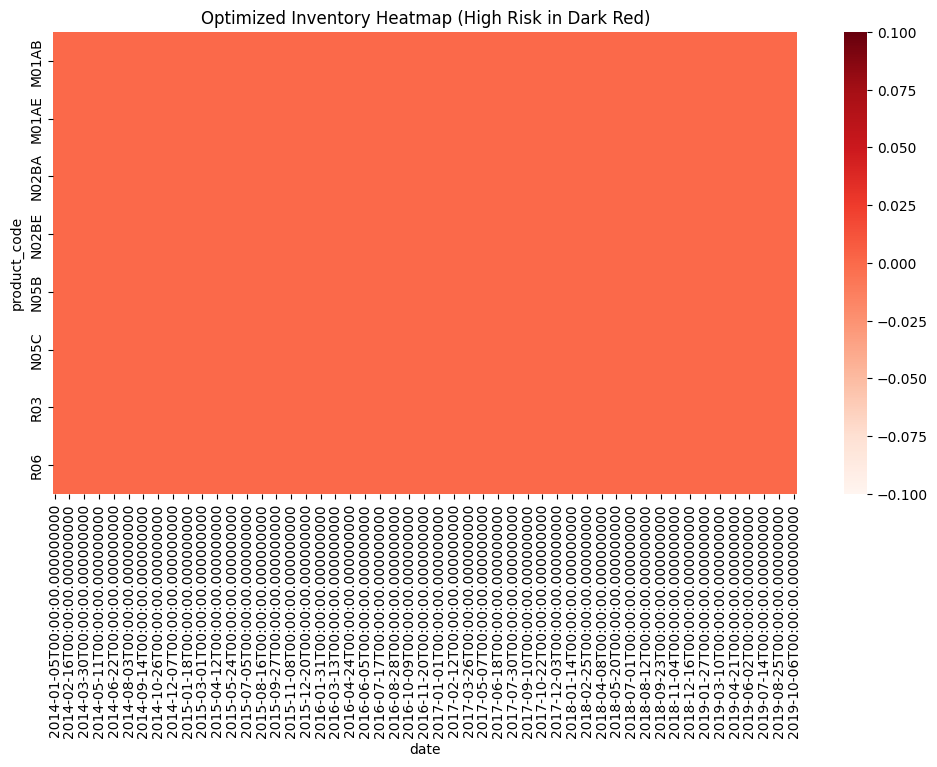

product_code
M01AB    0.0
M01AE    0.0
N02BA    0.0
N02BE    0.0
N05B     0.0
Name: shortage_count, dtype: float64

In [39]:
optimized_final = []
for idx, row in sales_long.iterrows():
    key = (row['product_code'], row['date'])
    optimized_final.append({
        'product_code': row['product_code'],
        'date': row['date'],
        'optimized_stock': stock_vars_final[key].varValue,
        'adjusted_safety_stock': row['adjusted_safety_stock']
    })

df_optimized_final = pd.DataFrame(optimized_final)

# 1. Interactive line chart of optimized stock vs safety stock
fig = px.line(df_optimized_final, x='date', y='optimized_stock', color='product_code', title='Optimized Stock Levels')
fig.add_scatter(x=df_optimized_final['date'], y=df_optimized_final['adjusted_safety_stock'], mode='lines', name='Safety Stock', line=dict(dash='dash'))
fig.show()

# 2. Stockout risk heatmap
stockout_heatmap = df_optimized_final.pivot_table(index='product_code', columns='date', values='optimized_stock')
plt.figure(figsize=(12,6))
sns.heatmap(stockout_heatmap, cmap='Reds')
plt.title('Optimized Inventory Heatmap (High Risk in Dark Red)')
plt.show()

# 3. Top 5 high-risk biologics (based on FDA shortage)
top_risk = sales_long.groupby('product_code')['shortage_count'].sum().sort_values(ascending=False).head(5)
top_risk
